# Data Science @ Dalia  // Session 1

This notebook is to be used as a guideline on the basic steps that we normally follow during an analysis

### Import the required libraries


In [10]:
import numpy as np  # main calculations - linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualisation
import seaborn as sns  # visualisation 


# we want to see our plots inline

%matplotlib inline  

### Read a file

In [11]:
football_results = pd.read_csv('results.csv')
football_results.head(10)




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [12]:

heroes_information = pd.read_csv('heroes_information.csv')
heroes_information.head(10)


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0
5,5,Absorbing Man,Male,blue,Human,No Hair,193.0,Marvel Comics,-,bad,122.0
6,6,Adam Monroe,Male,blue,-,Blond,-99.0,NBC - Heroes,-,good,-99.0
7,7,Adam Strange,Male,blue,Human,Blond,185.0,DC Comics,-,good,88.0
8,8,Agent 13,Female,blue,-,Blond,173.0,Marvel Comics,-,good,61.0
9,9,Agent Bob,Male,brown,Human,Brown,178.0,Marvel Comics,-,good,81.0


### Clean / Transform Data

In [13]:
heroes_information = pd.read_csv('heroes_information.csv')

print(heroes_information.shape) # Let’s look at the size

heroes_information[heroes_information.isnull().any(axis=1)] 
# Heroes with None data




(734, 11)


,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [14]:
clean_data = heroes_information.dropna()
print(clean_data.shape) # Size of the clean data



(719, 11)


In [15]:

# We assume that real superheroes have weight and height

real_heroes = heroes_information[(heroes_information['Weight']> 0)  & (heroes_information['Height']> 0)]
real_heroes.shape



(490, 11)

In [16]:
football_results['difference'] = abs(football_results['home_score']- football_results['away_score'])

football_results.loc[football_results['difference'].idxmax()]

date                            2001-04-11
home_team                        Australia
away_team                   American Samoa
home_score                              31
away_score                               0
tournament    FIFA World Cup qualification
city                         Coffs Harbour
country                          Australia
neutral                              False
difference                              31
Name: 23569, dtype: object

In [17]:
df = football_results

df[(df['home_team']=="Macedonia")| (df['away_team']=="Macedonia") ]

df['home_team'] = df['home_team'].replace({'Macedonia': 'Northern Macedonia'})
df['away_team'] = df['away_team'].replace({'Macedonia': 'Northern Macedonia'})

df[df['home_team'].str.contains("Macedonia") | df['away_team'].str.contains("Macedonia")  ]




,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,difference
17881,1993-10-13,Slovenia,Northern Macedonia,1,4,Friendly,Kranj,Slovenia,False,3
18073,1994-03-23,Northern Macedonia,Slovenia,2,0,Friendly,Skopje,Macedonia,False,2
18165,1994-05-14,Northern Macedonia,Albania,5,1,Friendly,Tetovo,Macedonia,False,4
18195,1994-06-01,Northern Macedonia,Estonia,2,0,Friendly,Skopje,Macedonia,False,2
18324,1994-08-31,Northern Macedonia,Turkey,0,2,Friendly,Skopje,Macedonia,False,2
18354,1994-09-07,Northern Macedonia,Denmark,1,1,UEFA Euro qualification,Skopje,Macedonia,False,0
18395,1994-10-12,Northern Macedonia,Spain,0,2,UEFA Euro qualification,Skopje,Macedonia,False,2
18461,1994-11-16,Belgium,Northern Macedonia,1,1,UEFA Euro qualification,Brussels,Belgium,False,0
18524,1994-12-17,Northern Macedonia,Cyprus,3,0,UEFA Euro qualification,Skopje,Macedonia,False,3
18684,1995-04-12,Northern Macedonia,Bulgaria,0,0,Friendly,Strumica,Macedonia,False,0


In [18]:
heroes_information = heroes_information.dropna()

heroes_information = heroes_information[(heroes_information['Weight']> 0)  & (heroes_information['Height']> 0)]

print(heroes_information.shape)



(489, 11)


In [19]:
heroes_information.groupby('Gender')['name'].count()



Gender
-          14
Female    141
Male      334
Name: name, dtype: int64

In [20]:
weights_by_race = heroes_information.groupby('Race')['Weight'].mean()
weights_by_race.sort_values()


Race
Flora Colossus         4.000000
Cosmic Entity         16.000000
Yoda's species        17.000000
Kakarantharaian       18.000000
Animal                25.000000
Mutant / Clone        50.000000
Talokite              54.000000
Frost Giant           58.000000
Human / Cosmic        59.000000
Human-Kree            63.000000
Icthyo Sapien         65.000000
Kryptonian            66.200000
Neyaphem              67.000000
Saiyan                67.500000
Amazon                68.500000
Tamaranean            71.000000
Inhuman               72.500000
Zen-Whoberian         77.000000
Human-Spartoi         79.000000
Human-Vulcan          81.000000
Luphomoid             83.000000
Mutant                89.392157
Ungaran               90.000000
Korugaran             92.000000
Human-Vuldarian       95.000000
Vampire               97.000000
Human                 97.681250
Demi-God              98.500000
-                    102.832335
Atlantean            104.200000
Clone                113.000000
Mar

In [21]:
heroes_information.groupby('Gender')['name'].count()



Gender
-          14
Female    141
Male      334
Name: name, dtype: int64

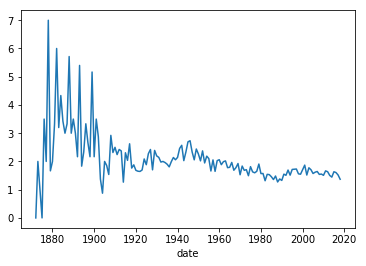

In [29]:
df = football_results.copy()

df['difference'] = abs(df['home_score']- df['away_score'])
df['date'] = pd.to_datetime(df['date']).map(lambda x: x.year)
result = df.groupby('date')['difference'].mean()

result.plot.line()


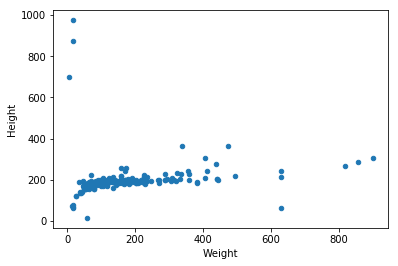

In [30]:
heroes_information[['Weight','Height']].plot.scatter(x='Weight', y='Height')




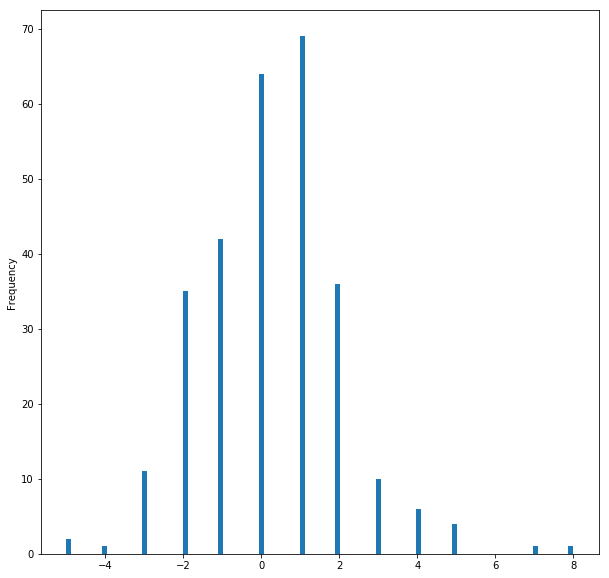

In [51]:
greece_data = df[df['home_team']=='Greece'].copy() 
greece_data['difference'] = greece_data.apply(lambda row: row['home_score'] - row['away_score'],axis=1)


greece_data['difference'].plot.hist( bins=100,figsize =(10,10))
